In [60]:
import pandas as pd
import pickle
import main
from datetime import date
import matplotlib.pyplot as plt

In [58]:
date.today().isoformat()

'2022-04-05'

In [12]:
want_need = main.priority_dict
with open('/Users/ellie/Documents/Projects/RawData/OBdata/test_df_05042022.pkl','rb') as f:
    df = pickle.load(f)

In [18]:
want_need.values()

dict_values(['Essential', 'Unknown', 'Want', 'Want', 'Want', 'Want', 'Future You', 'Want', 'Essential', 'Want', 'Want', 'Essential', 'Essential', 'Future You', 'Future You', 'Essential', 'Essential', 'Unknown', 'Essential', 'Want', 'Future You', 'Want', 'Essential', 'Want', 'Want', 'Unknown', 'Want', 'Want'])

In [14]:
df['need_want']=df.transaction_class.map(want_need)

In [32]:
df[df.need_want=='Unknown']

,description,timestamp,currency,type,amount,id,merchant,category,runningBalance.currency,runningBalance.amount,description_anon,transaction_class,need_want
16,MR JOHN SMITH,2021-12-17,GBP,CREDIT,137.60,d17ecd1518b326c91757d144cbb4e09e,,CREDIT,GBP,497.26,MR <PERSON>,PersonalTransfer,Unknown
20,REGENDA REDWING,2021-12-20,GBP,DEBIT,-150.00,107b103cddfb9afedc8152d6b5caeb93,,PURCHASE,GBP,-982.53,REGENDA REDWING,PersonalTransfer,Unknown
32,LNK ATM WITHDRAWAL,2021-12-23,GBP,DEBIT,-100.00,90a6086638e6fa7f348f0c4dbb395518,,ATM,GBP,-693.52,LNK ATM WITHDRAWAL,Cash,Unknown
41,MS JANE DOE,2021-12-27,GBP,DEBIT,-7.93,64b1deb307f4bb43d3d2177feea72e88,,TRANSFER,GBP,-655.24,MS <PERSON>,PersonalTransfer,Unknown
47,MS JANE DOE,2021-12-27,GBP,CREDIT,15.86,ab8b57a35000deca0d772e22b2f2c303,,TRANSFER,GBP,-588.79,MS <PERSON>,PersonalTransfer,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,MR JOHN SMITH,2022-03-06,GBP,CREDIT,137.60,cab2e45ba28210834ff1f563ae127059,,CREDIT,GBP,597.99,MR <PERSON>,PersonalTransfer,Unknown
414,MS JANE DOE,2022-03-06,GBP,CREDIT,61.89,4e5ef55c8ac2ee66619a268a309c8c29,,TRANSFER,GBP,659.88,MS <PERSON>,PersonalTransfer,Unknown
420,MS JANE DOE,2022-03-07,GBP,DEBIT,-70.00,36a1f5d7bf1c8ad639b5bc8e1655932f,,TRANSFER,GBP,192.47,MS <PERSON>,PersonalTransfer,Unknown
423,REGENDA REDWING RE,2022-03-08,GBP,DEBIT,-100.00,08b1a180cfabe2e474a3223f169dc09f,,PURCHASE,GBP,382.03,REGENDA REDWING RE,PersonalTransfer,Unknown


In [53]:
def budgeting_score(user_data):

    ''' '''
   
    df_week = pd.DataFrame(user_data[user_data.type=='DEBIT'].groupby('need_want')['amount'].sum()).reset_index().rename(columns={'need_want':'classification'})
    df = df_week.copy()
    df.amount=0-df.amount
    df=df[df.classification!='Unknown'].reset_index(drop=True)

    expected_rows = ['Wants','Essentials','Future You']
    ideals = {'Essential':50,'Want':30,'Future You':20}


    for i in expected_rows:
        if i not in list(df.classification):
            df.loc[len(df)]=[str(i),0]
    
    df['Ideal_prop']=df.classification.map(ideals)

    try:
        df['prop_spend']=100*(df.amount/sum(df.amount))
    except ZeroDivisionError:
        df['prop_spend']=0

    df['ideal_diff']=0
    df.loc[(df.classification=='Wants')|(df.classification=='Essentials'),'ideal_diff']=df.Ideal_prop-df.prop_spend
    df.loc[df.classification=='Future You','ideal_diff']=df.Ideal_prop-df.prop_spend
    df.ideal_diff = df.ideal_diff.fillna(0)
    
    for i,j in enumerate(df.ideal_diff):

        if j<0:
            df.ideal_diff.iloc[i]=0-df.ideal_diff.iloc[i]
            
            
    budgeting_score = round(100-sum(df.ideal_diff))
    ideal_save=round(sum(df.amount)*0.2)
    ideal_essentials=round(sum(df.amount)*0.5)
    ideal_wants=round(sum(df.amount)*0.3)


    print(f'Your budgeting score on {date.today().isoformat()} is {budgeting_score}. The maximum attainable score is 100')
    print(f'The perfect budgeting score for this period would be achieved by spending £{ideal_essentials} on essentials and investing £{ideal_save} in your future self, which would leave £{ideal_wants} for fun!')


In [68]:
def budget_pie(user_data):

    ''' '''
        
    df = pd.DataFrame(user_data[user_data.type=='DEBIT'].groupby('need_want')['amount'].sum()).reset_index().rename(columns={'need_want':'classification'})
    df.amount=0-df.amount
    df=df[df.classification!='Unknown'].reset_index()

    #colours = ['GreenYellow','Yellow','HotPink']
    labels = ['Essential','Future You','Want']

    cdict={'Essential':'Aquamarine',
           'Future You':'Yellow',
           'Want':'HotPink'}

    fracs = [50, 20, 30]

    plt.rcParams['patch.edgecolor'] = 'black'
    fig = plt.figure()
     
    ax1 = fig.add_axes([0,0,1,1])
    ax1.axis('equal')
    ax1.pie(df.amount, labels = df.classification,colors=[cdict[key]for key in df.classification], autopct='%1.1f%%',radius = 1.2)

    ax2 = fig.add_axes([1,0,1,1])
    ax2.axis('equal')
    ax2.pie(fracs, labels=labels, colors=[cdict[key]for key in labels], autopct='%1.1f%%', explode =[0,0,0.05],shadow=True,radius = 1.2)

    ax1.set_title('Your outgoings',y=0.6)
    ax2.set_title('Your Ideal outgoings',y=0.6)

    plt.show()


In [74]:
def spend_bar(user_data):

    df = pd.DataFrame(user_data[user_data.type=='DEBIT'].groupby('transaction_class')['amount'].sum()).reset_index()
    df.amount=0-df.amount
    df=df[df.transaction_class!='unknown'].reset_index().sort_values(by='amount',ascending=False).copy()
    fig = plt.figure(figsize=[8,8])
    ax = fig.add_axes([0,0,1,1])
    ax.bar(df.transaction_class,100*(df.amount/sum(df.amount)))
    plt.xticks(rotation=90)
    plt.show()

Your budgeting score on 2022-04-05 is 90. The maximum attainable score is 100
The perfect budgeting score for this period would be achieved by spending £2870 on essentials and investing £1148 in your future self, which would leave £1722 for fun!


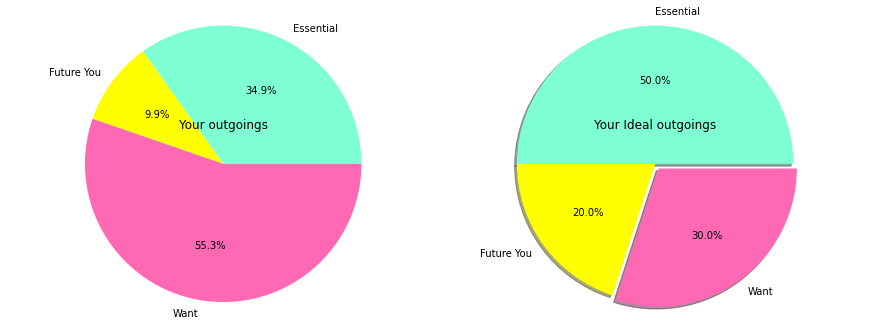

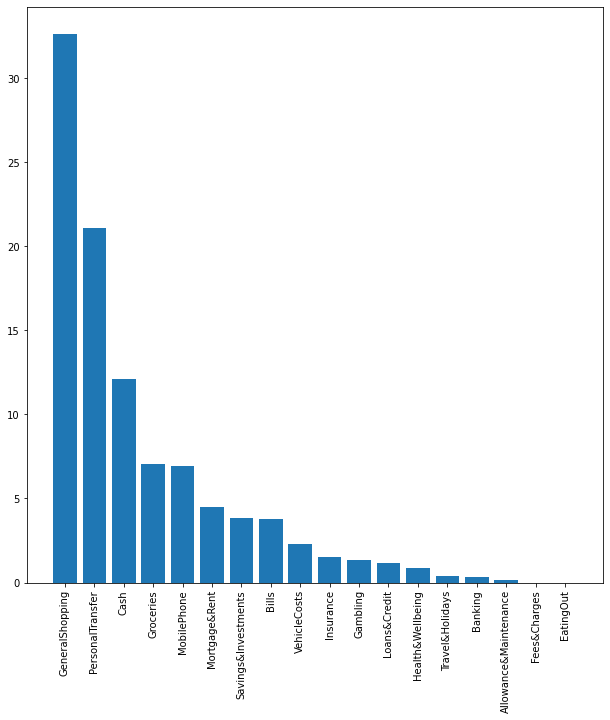

In [75]:
budgeting_score(df)
budget_pie(df)
spend_bar(df)